#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("..")

In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [23]:
plt.style.use('seaborn-whitegrid')

In [4]:
nRuns = 3
epochs = 10

In [5]:
accs_all_hh_ih = np.load('train-accs-all-weights-hh-ih-bptt.npy')
accs_all_hh_hh = np.load('train-accs-all-weights-same-hh-ih-bptt.npy')
accs_sub_hh_ih = np.load('train-accs-sub-weights-hh-ih-bptt.npy')
accs_sub_hh_hh = np.load('train-accs-sub-weights-same-hh-ih-bptt.npy')

In [6]:
losses_all_hh_ih = np.load('train-losses-all-weights-hh-ih-bptt.npy')
losses_all_hh_hh = np.load('train-losses-all-weights-same-hh-ih-bptt.npy')
losses_sub_hh_ih = np.load('train-losses-sub-weights-hh-ih-bptt.npy')
losses_sub_hh_hh = np.load('train-losses-sub-weights-same-hh-ih-bptt.npy')

In [10]:
accs_avgs = np.zeros((4,epochs))
losses_avgs = np.zeros((4,epochs))

accs_stds = np.zeros((4,epochs))
losses_stds = np.zeros((4,epochs))

In [19]:
accs_avgs[0] = np.mean(accs_all_hh_ih,0)
accs_avgs[1] = np.mean(accs_all_hh_hh,0)
accs_avgs[2] = np.mean(accs_sub_hh_ih,0)
accs_avgs[3] = np.mean(accs_sub_hh_hh,0)

In [30]:
losses_avgs[0] = np.mean(losses_all_hh_ih,0)
losses_avgs[1] = np.mean(losses_all_hh_hh,0)
losses_avgs[2] = np.mean(losses_sub_hh_ih,0)
losses_avgs[3] = np.mean(losses_sub_hh_hh,0)

In [18]:
accs_stds[0] = np.std(accs_all_hh_ih,0)
accs_stds[1] = np.std(accs_all_hh_hh,0)
accs_stds[2] = np.std(accs_sub_hh_ih,0)
accs_stds[3] = np.std(accs_sub_hh_hh,0)

In [31]:
losses_stds[0] = np.std(losses_all_hh_ih,0)
losses_stds[1] = np.std(losses_all_hh_hh,0)
losses_stds[2] = np.std(losses_sub_hh_ih,0)
losses_stds[3] = np.std(losses_sub_hh_hh,0)

(0.0, 1.0)

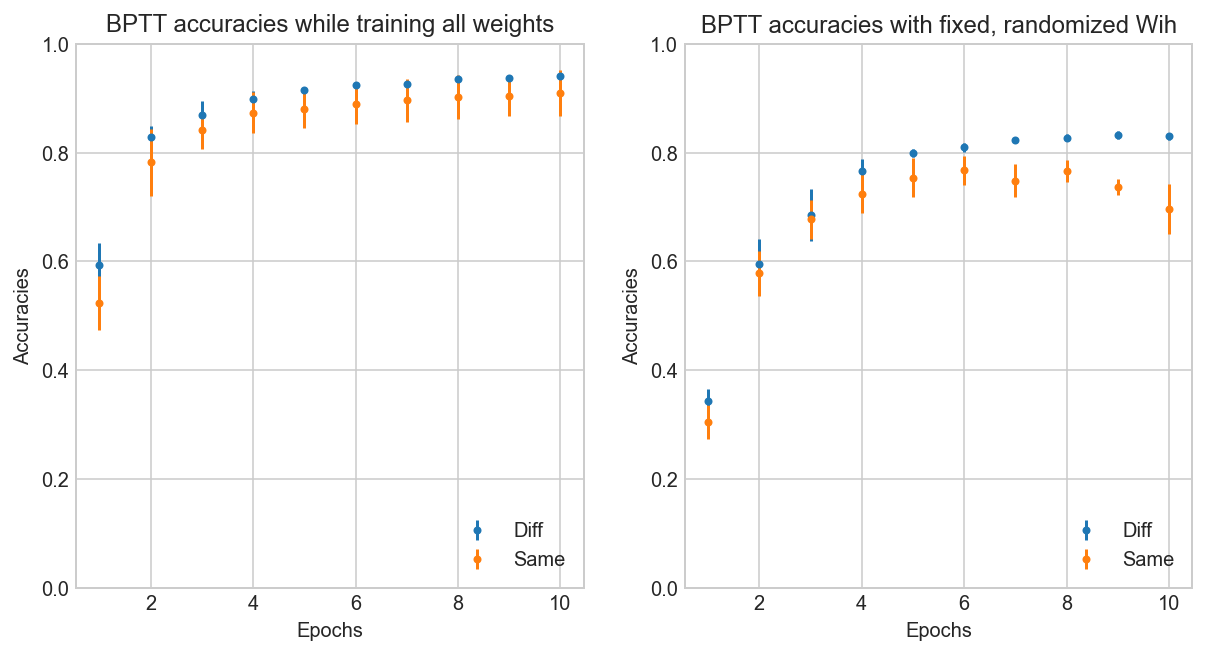

In [28]:
ff_accs = plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('BPTT accuracies while training all weights')
plt.errorbar(np.arange(1,epochs+1),accs_avgs[0],yerr=accs_stds[0],label='Diff',fmt='.')
plt.errorbar(np.arange(1,epochs+1),accs_avgs[1],yerr=accs_stds[1],label='Same',fmt='.')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.ylim(0,1)

plt.subplot(122)
plt.title('BPTT accuracies with fixed, randomized Wih')
plt.errorbar(np.arange(1,epochs+1),accs_avgs[2],yerr=accs_stds[2],label='Diff',fmt='.')
plt.errorbar(np.arange(1,epochs+1),accs_avgs[3],yerr=accs_stds[3],label='Same',fmt='.')
plt.legend(loc='lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.ylim(0,1)

In [29]:
ff_accs.savefig('BPTT-accs-init.png',dpi=300)

(1.4, 2.5)

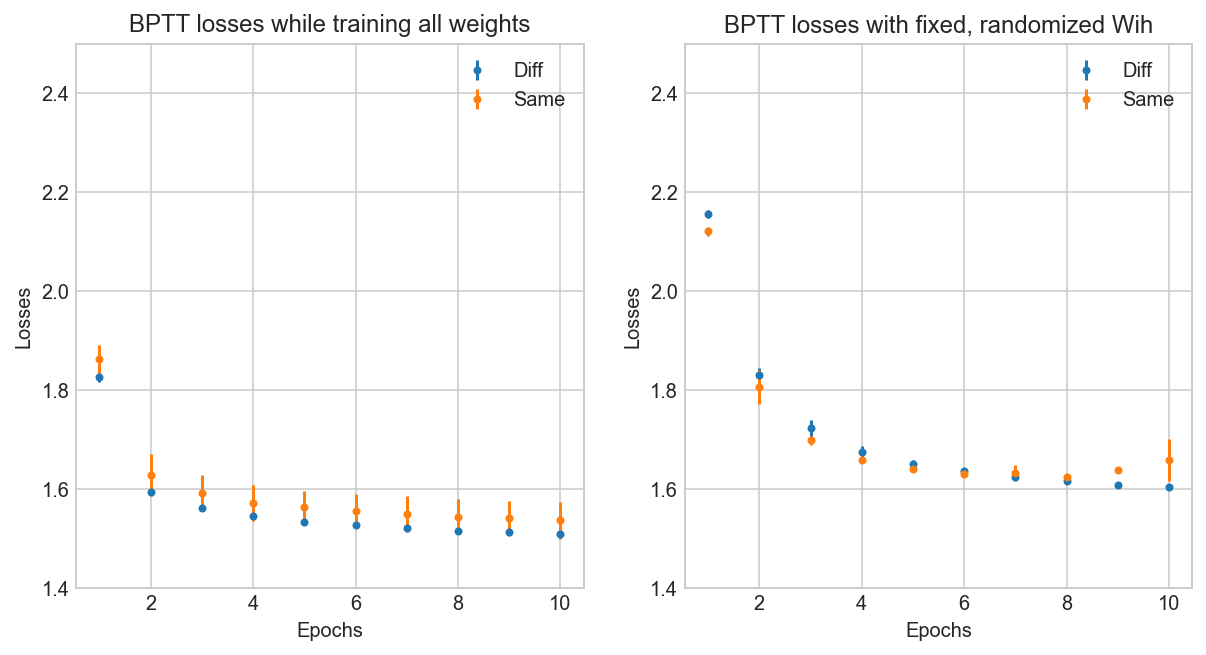

In [42]:
ff_losses = plt.figure(figsize=(10,5))

plt.subplot(121)
plt.title('BPTT losses while training all weights')
plt.errorbar(np.arange(1,epochs+1),losses_avgs[0],yerr=losses_stds[0],label='Diff',fmt='.')
plt.errorbar(np.arange(1,epochs+1),losses_avgs[1],yerr=losses_stds[1],label='Same',fmt='.')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.ylim(1.4,2.5)

plt.subplot(122)
plt.title('BPTT losses with fixed, randomized Wih')
plt.errorbar(np.arange(1,epochs+1),losses_avgs[2],yerr=losses_stds[2],label='Diff',fmt='.')
plt.errorbar(np.arange(1,epochs+1),losses_avgs[3],yerr=losses_stds[3],label='Same',fmt='.')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.ylim(1.4,2.5)

In [43]:
ff_losses.savefig('BPTT-losses-init.png',dpi=300)

In [33]:
losses_avgs

array([[1.82666955, 1.59265221, 1.56061001, 1.54401457, 1.53375576,
        1.52614881, 1.52119093, 1.51539432, 1.51218666, 1.50919934],
       [1.86162861, 1.62832242, 1.59208358, 1.57194858, 1.56210133,
        1.55455695, 1.54857702, 1.54356988, 1.54028227, 1.53582865],
       [2.15620073, 1.82972629, 1.72209602, 1.67508062, 1.65002981,
        1.6352446 , 1.62339832, 1.61658896, 1.60856447, 1.60371088],
       [2.12124956, 1.80598781, 1.69838929, 1.65903767, 1.6400624 ,
        1.63030468, 1.63187073, 1.6240461 , 1.63731097, 1.65796254]])

In [17]:
np.mean(accs_all_hh_ih,0)

array([0.59416667, 0.8281    , 0.86973333, 0.89923333, 0.91453333,
       0.9249    , 0.9266    , 0.93606667, 0.9379    , 0.94073333])

In [15]:
np.mean(accs_all_hh_ih)

array([[0.5458, 0.8012, 0.8375, 0.8797, 0.9064, 0.9212, 0.9232, 0.9339,
        0.9356, 0.9406],
       [0.6431, 0.854 , 0.9   , 0.9121, 0.9208, 0.9273, 0.9299, 0.9381,
        0.9398, 0.9422],
       [0.5936, 0.8291, 0.8717, 0.9059, 0.9164, 0.9262, 0.9267, 0.9362,
        0.9383, 0.9394]])

In [ ]:
ffepoch = plt.figure(figsize=(15,5))

plt.subplot(231)
plt.title('Image ID Decoding - 1D')
plt.errorbar(np.arange(n_epochs+1),mean_accs_L4imgPC[0],yerr=std_accs_L4imgPC[0],label='L4',fmt='.')
plt.errorbar(np.arange(n_epochs+1),mean_accs_L23imgPC[0],yerr=std_accs_L23imgPC[0],label='L23',fmt='.')
plt.errorbar(np.arange(n_epochs+1),mean_accs_L56imgPC[0],yerr=std_accs_L56imgPC[0],label='L56',fmt='.')
plt.errorbar(np.arange(n_epochs+1),mean_accs_H4imgPC[0],yerr=std_accs_H4imgPC[0],label='H4',fmt='.')
plt.errorbar(np.arange(n_epochs+1),mean_accs_H23imgPC[0],yerr=std_accs_H23imgPC[0],label='H23',fmt='.')
plt.errorbar(np.arange(n_epochs+1),mean_accs_H56imgPC[0],yerr=std_accs_H56imgPC[0],label='H56',fmt='.')
plt.xlabel('Epochs')
plt.ylim(0,1.1)